# Pandas Continued with specific application

The data used here is obtained from the [National Seismological Centre (NSC) database](https://seismonepal.gov.np/earthquakes/) and it is the data for the earthquakes in Nepal from 1990 to 2020. A relativily small database for measurement of some important aspects of Earthquaks in Nepal. The following is the source code for data extraction and cleaning

In [98]:
import pandas as pd 
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('seaborn-pastel')

In [99]:
#Function to fetch table to data
def fetch_data_from_url(url):
    #gets the page content from the url 
    html = requests.get(url).content
    #read the table content of html 
    df_list = pd.read_html(html)
    #targets the first table from the list of table
    df = df_list[0]
    df.index += 1 
    return df

In [100]:
#a better way to do this 
urls = ["http://seismonepal.gov.np/earthquakes/1994",
       "http://seismonepal.gov.np/earthquakes/1995",
       "http://seismonepal.gov.np/earthquakes/1996",
       "http://seismonepal.gov.np/earthquakes/1997",
       "http://seismonepal.gov.np/earthquakes/1998",
       "http://seismonepal.gov.np/earthquakes/1999",
       "http://seismonepal.gov.np/earthquakes/2000",
       "http://seismonepal.gov.np/earthquakes/2001",
       "http://seismonepal.gov.np/earthquakes/2002",
       "http://seismonepal.gov.np/earthquakes/2003",
       "http://seismonepal.gov.np/earthquakes/2004",
       "http://seismonepal.gov.np/earthquakes/2005",
       "http://seismonepal.gov.np/earthquakes/2006",
       "http://seismonepal.gov.np/earthquakes/2007",
       "http://seismonepal.gov.np/earthquakes/2008",
       "http://seismonepal.gov.np/earthquakes/2009",
       "http://seismonepal.gov.np/earthquakes/2010",
       "http://seismonepal.gov.np/earthquakes/2011",
       "http://seismonepal.gov.np/earthquakes/2012",
       "http://seismonepal.gov.np/earthquakes/2013",
       "http://seismonepal.gov.np/earthquakes/2014",
       "http://seismonepal.gov.np/earthquakes/2015",
       "http://seismonepal.gov.np/earthquakes/2016",
       "http://seismonepal.gov.np/earthquakes/2017",
       "http://seismonepal.gov.np/earthquakes/2018",
       "http://seismonepal.gov.np/earthquakes/2019",
       "http://seismonepal.gov.np/earthquakes/2020"]

#getting all the data from 1994-2019 in one place     
result = []
for url in urls:
    result.append(fetch_data_from_url(url))

In [101]:
#concatenate all the table from result array to one dataframe
df = pd.concat(result)

In [102]:
df = df.reset_index()

In [103]:
df.columns

Index(['index', 'Date', 'Time', 'Latitude', 'Longitude', 'Magnitude(ML)',
       'Remarks', 'Epicenter', 'Form'],
      dtype='object')

In [104]:
#dropping the un-necessary columns
df = df.drop(['Form','Remarks','index'],axis = 1)

In [105]:
df.columns = ['Date', 'Time', 'Lat', 'Long', 'Magnitude', "Epicenter"]

In [106]:
df.head()

,Date,Time,Lat,Long,Magnitude,Epicenter
0,B.S:2051-8-28 A.D:1994-12-13,Local:11:00UTC:N/A,28.70,82.88,4.6,Rukum
1,B.S:2051-8-27 A.D:1994-12-12,Local:11:00UTC:N/A,29.84,80.69,4.6,Darchula
2,B.S:2051-8-12 A.D:1994-11-27,Local:11:00UTC:N/A,29.72,81.56,4.5,Bajura
3,B.S:2051-8-6 A.D:1994-11-21,Local:11:00UTC:N/A,29.54,81.15,4.2,Bajhang
4,B.S:2051-7-8 A.D:1994-10-24,Local:11:00UTC:N/A,28.92,82.00,4.7,Jajarkot


In [107]:
#change the Date column to a proper format(removing the nepali date) (NOT NECESSARY)
dates = []
for line in df.Date:
#   Split the two dates given 
    date = line.split()
    date = line.split(":")
    del date[:2]
    dates.append(date)

In [108]:
# Change the Time column to standard format
Times = []
for line in df.Time:
    Time = line.split("Local:")  
    del Time[0]
    for time_line in Time:
        Time = time_line.split('UTC:')
        del Time[1]
#         print(Time)
    Times.append(Time)

In [109]:
#Covert the date and time column to pandas dataframe
Times = pd.DataFrame(Times)
Times.columns =['Time']
Dates = pd.DataFrame(dates)
Dates.columns=['Date']

In [110]:
# Concatenate the date and time dataframe together separated by space
Dates['DateTime'] = Dates["Date"]+ " " + Times["Time"].map(str)

In [111]:
len(Dates)

1008

In [112]:
# checking to see if the two dates in the two dataframe match
test = pd.DataFrame({'x':Dates.DateTime, 'y':df.Date})

In [113]:
#Convert the DateTime column to datetime type
Dates['DateTime'] = pd.to_datetime(Dates['DateTime'],  errors='coerce')

In [114]:
# Merge the datetime column to the main dataframe
df['DateTime'] = Dates['DateTime']

In [115]:
#Drop the columns not required
df = df.drop(['Date','Time'],axis = 1)

In [116]:
df.head()

,Lat,Long,Magnitude,Epicenter,DateTime
0,28.70,82.88,4.6,Rukum,1994-12-13 11:00:00
1,29.84,80.69,4.6,Darchula,1994-12-12 11:00:00
2,29.72,81.56,4.5,Bajura,1994-11-27 11:00:00
3,29.54,81.15,4.2,Bajhang,1994-11-21 11:00:00
4,28.92,82.00,4.7,Jajarkot,1994-10-24 11:00:00


In [117]:
df = df.sort_values(by='DateTime')

In [118]:
df = df.reset_index()

In [119]:
#Check where data is null
print(np.where(pd.isnull(df)))
print(np.where(df.Epicenter == "Kailali"))
print(np.where(df.Epicenter == "Solukhumbu"))
print(np.where(df.Epicenter == "Niseldhar, Baglung"))
df[124:127]

(array([25]), array([4]))
(array([101, 102, 108]),)
(array([  28,   41,   47,   56,   57,   98,  167,  259,  382,  977, 1003]),)
(array([139, 140, 141]),)


,index,Lat,Long,Magnitude,Epicenter,DateTime
124,118,28.47,83.91,5.0,Kaski,2003-11-22 11:00:00
125,117,28.30,83.88,4.4,Kaski,2003-11-23 11:00:00
126,116,28.45,83.94,4.5,Kaski,2003-11-23 11:00:00


In [120]:
# Converted the empty to India because the coordianted were in India, one of the Kailali coordiantes was wrong
df.Epicenter[25]="India"
np.where(df.Epicenter == "Kailali")
df.Long[108] = 80.75
df.Long[167] = 86.842
df.Long[139] = 82.96

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [121]:
#Drop any row with epicenters outside Nepal
check = ['India',"Bangladesh","Bhuj/India","Bhutan","Chamauli/India","Tibet","Bangaladesh","Pithoragarh","Sikkim"
        ,"India (close to Darchula)", "Jhapa-India Border Region"]

for place in check:
    for epicenter in df.Epicenter:
        df = df[df.Epicenter != place]

In [122]:
df.head()

,index,Lat,Long,Magnitude,Epicenter,DateTime
0,9,27.75,86.16,5.1,Dolakha,1994-06-25 05:45:00
1,8,29.37,81.52,5.5,Bajura,1994-07-17 11:00:00
3,6,28.34,87.35,4.8,Sankhuwasabha,1994-09-25 11:00:00
4,5,29.00,82.26,4.6,Jajarkot,1994-10-22 11:00:00
5,4,28.92,82.00,4.7,Jajarkot,1994-10-24 11:00:00


In [123]:
df.to_csv('earthquake.csv')

In [124]:
df[139:142]

,index,Lat,Long,Magnitude,Epicenter,DateTime
154,171,27.76,86.07,5.0,Dolakha,2005-02-08 11:00:00
155,170,28.27,84.39,5.0,Lamjung,2005-03-05 11:00:00
156,169,28.25,84.39,5.4,Lamjung,2005-03-19 11:00:00


#### More often than not, earthquake data obtained from international catalogues such as the [International Seismological Center (ISC) Catalogue](http://www.isc.ac.uk/iscbulletin/search/bulletin/) are often already cleaned up data and only require minor tweaking.

### Now we move onto the Analysis

In [125]:
df = pd.read_csv('earthquake.csv')

In [126]:
df.head()

,Unnamed: 0,index,Lat,Long,Magnitude,Epicenter,DateTime
0,0,9,27.75,86.16,5.1,Dolakha,1994-06-25 05:45:00
1,1,8,29.37,81.52,5.5,Bajura,1994-07-17 11:00:00
2,3,6,28.34,87.35,4.8,Sankhuwasabha,1994-09-25 11:00:00
3,4,5,29.00,82.26,4.6,Jajarkot,1994-10-22 11:00:00
4,5,4,28.92,82.00,4.7,Jajarkot,1994-10-24 11:00:00


In [127]:
df.describe()

,Unnamed: 0,index,Lat,Long,Magnitude
count,975.000000,975.000000,975.000000,975.000000,975.000000
mean,510.373333,508.933333,28.154581,84.907997,4.433026
std,289.518481,289.121971,0.749923,1.910219,0.450686
min,0.000000,0.000000,26.630000,80.370000,3.600000
25%,259.500000,260.500000,27.710000,83.970000,4.100000
50%,513.000000,510.000000,27.900000,85.530000,4.300000
75%,761.500000,757.500000,28.300000,86.120000,4.600000
max,1007.000000,1007.000000,30.370000,88.330000,7.600000


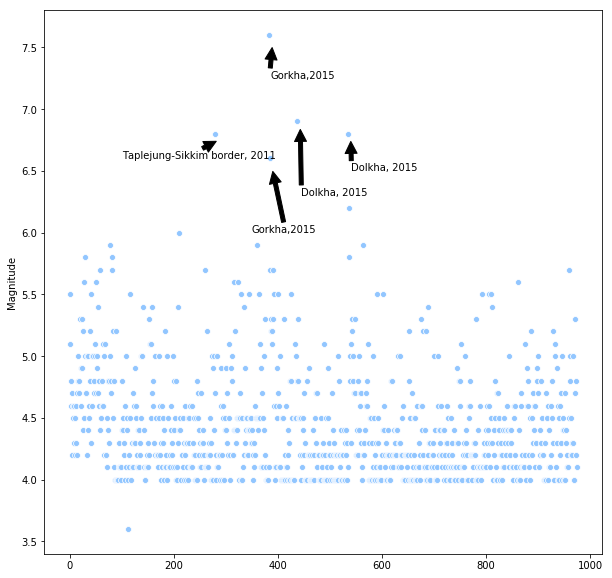

In [128]:
plt.figure(figsize=(10,10))
sns.scatterplot(y="Magnitude", x=df.Magnitude.index , data=df)
plt.annotate('Gorkha,2015', xy=(389, 7.5), xytext=(385, 7.25),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Gorkha,2015', xy=(390, 6.5), xytext=(350, 6.0),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Dolkha, 2015', xy=(443, 6.84), xytext=(445, 6.3),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Dolkha, 2015', xy=(540, 6.74), xytext=(541, 6.5),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Taplejung-Sikkim border, 2011', xy=(282, 6.74), xytext=(100, 6.6),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.savefig('overall_earthquakes.png')

In [130]:
#array for storing the size\_class
size_class = []

for magnitude in df.Magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        size_class.append("Minor")
    elif magnitude >=4.0 and magnitude <=4.9:
        size_class.append("Light")
    elif magnitude >=5.0 and magnitude <=5.9:
        size_class.append("Moderate")
    elif magnitude >=6.0 and magnitude <=6.9:
        size_class.append("Strong")
    elif magnitude >=7.0 and magnitude <=7.9:
        size_class.append("Major")
    else:
        size_class.append("Great")

#Creating a column in the dataframe called size\_class
df['size_class'] = size_class

df_size_class = pd.DataFrame(df.size_class.groupby(df.size_class).count())

In [131]:
scale = []
for magnitude in df.Magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        scale.append("Limited Damage")
    elif magnitude >=4.0 and magnitude <=4.9:
        scale.append("Minor Damage")
    elif magnitude >=5.0 and magnitude <=5.9:
        scale.append("Slight Damage")
    elif magnitude >=6.0 and magnitude <=6.9:
        scale.append("Severe Damage")
    elif magnitude >=7.0 and magnitude <=7.9:
        scale.append("Serious Damage")
    else:
        scale.append("Great Damage")
df['scale'] = scale